In [23]:
%load_ext autoreload
%autoreload 2

import keras
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from Jlayers import SimpleLayer
from utilsSimpleConv2D import*
from SpectralLayer import Spectral
from spectralconvolutions import *
from tensorflow.keras.layers import Dense,Layer
from typing import Tuple,List,Any,Dict
from tensorflow.python.keras import activations, initializers, regularizers, constraints

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test=x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0

flat_train = np.reshape(x_train, [x_train.shape[0], 28 * 28])
flat_test = np.reshape(x_test, [x_test.shape[0], 28 * 28])

In [4]:
## Parametres

In [5]:
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : False,
    'is_diag_end_trainable' : True,
}

In [6]:
## Train phi

In [7]:
accuracy=list()
parameters_one={ "use_lambda_out":False,
                 "use_lambda_in":False,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model1.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model1.add(keras.layers.MaxPooling2D((2,2)))     
                       
    model1.add(keras.layers.Flatten())     
    
    model1.add(Spectral(N2[i], **spectral_config,use_bias=False, activation=None))
    model1.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model1.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 14ms/step - loss: 1.8657 - accuracy: 0.3530
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 15ms/step - loss: 0.9287 - accuracy: 0.6894
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 15ms/step - loss: 0.9173 - accuracy: 0.6998
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 16ms/step - loss: 0.4024 - accuracy: 0.8798
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 15ms/step - loss: 0.3223 - accuracy: 0.9054
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 5s 16ms/step - loss: 0.3411 - accuracy: 0.9006
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 5s 16ms/step - loss: 0.3221 - accuracy: 0.9050
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 5s 16ms/step - loss: 0.3622 - 

In [8]:
score1=list()
for i in range(len(N2)):
    score1.append(accuracy[i][1])

In [9]:
## Train phi and Lambda in , out=0, initialiser in=1

In [10]:
accuracy=list()
parameters_one={ "use_lambda_out":False,
                 "use_lambda_in":True,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model2.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model2.add(keras.layers.MaxPooling2D((2,2)))      
                       
    model2.add(keras.layers.Flatten())     
    
    model2.add(Spectral(N2[i], **spectral_config,use_bias=False, activation=None))
    model2.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model2.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 15ms/step - loss: 0.6135 - accuracy: 0.8092
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 15ms/step - loss: 0.4855 - accuracy: 0.8538
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 16ms/step - loss: 0.4148 - accuracy: 0.8775
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 15ms/step - loss: 0.2612 - accuracy: 0.9221
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 15ms/step - loss: 0.2548 - accuracy: 0.9262
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 5s 15ms/step - loss: 0.2018 - accuracy: 0.9377
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 8s 25ms/step - loss: 0.1979 - accuracy: 0.9433
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 9s 27ms/step - loss: 0.2020 - 

In [11]:
score2=list()
for i in range(len(N2)):
    score2.append(accuracy[i][1])

In [12]:
## Train phi and Lambda out, in=1, initialiser out=0

In [13]:
accuracy=list()
parameters_one={ "use_lambda_out":True,
                 "use_lambda_in":False,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model3 = tf.keras.Sequential()
    model3.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model3.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model3.add(keras.layers.MaxPooling2D((2,2)))     

    model3.add(keras.layers.Flatten())     
    
    model3.add(Spectral(N2[i], **spectral_config,use_bias=False, activation=None))
    model3.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model3.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 15ms/step - loss: 0.7542 - accuracy: 0.7659
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 6s 19ms/step - loss: 0.4241 - accuracy: 0.8761
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 15ms/step - loss: 0.4239 - accuracy: 0.8745
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 17ms/step - loss: 0.3132 - accuracy: 0.9035
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 16ms/step - loss: 0.3182 - accuracy: 0.9008
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 9s 27ms/step - loss: 0.2873 - accuracy: 0.9114
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 9s 29ms/step - loss: 0.2564 - accuracy: 0.9266
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 6s 18ms/step - loss: 0.2352 - 

In [14]:
score3=list()
for i in range(len(N2)):
    score3.append(accuracy[i][1])

In [15]:
## Train phi and Lambda out and Lambda in

In [16]:
accuracy=list()
parameters_one={ "use_lambda_out":True,
                 "use_lambda_in":True,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model4 = tf.keras.Sequential()
    model4.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model4.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model4.add(keras.layers.MaxPooling2D((2,2)))      
                       
    model4.add(keras.layers.Flatten())     
    
    model4.add(Spectral(N2[i], **spectral_config,use_bias=False, activation=None))
    model4.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model4.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 14ms/step - loss: 2.3026 - accuracy: 0.0980
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 6s 16ms/step - loss: 0.3239 - accuracy: 0.9021
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 16ms/step - loss: 0.3457 - accuracy: 0.8979
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 6s 18ms/step - loss: 0.2260 - accuracy: 0.9340
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 6s 19ms/step - loss: 0.2026 - accuracy: 0.9383
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 6s 19ms/step - loss: 0.1769 - accuracy: 0.9466
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 6s 19ms/step - loss: 0.1842 - accuracy: 0.9442
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 5s 17ms/step - loss: 0.1562 - 

In [17]:
score4=list()
for i in range(len(N2)):
    score4.append(accuracy[i][1])

In [18]:
## Reference

In [33]:
accuracy=list()

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200

for i in range(len(N2)):

    print(f"Iteration {i}: nombre de neurones: {N2[i]}")
    model5 = tf.keras.Sequential()
    model5.add(tf.keras.layers.Input(shape=(28,28,1)))

    
    model5.add(keras.layers.Conv2D(1,(3,3), use_bias=False,activation="relu"))
    model5.add(keras.layers.MaxPooling2D((2,2))) 

    model5.add(keras.layers.Flatten())  


    model5.add(Dense(N2[i],use_bias=False,activation=None))
    model5.add(Dense(10, use_bias=False, activation='softmax'))
    
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model5.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9213
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.9174
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.9203
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 1s 4ms/step - loss: 0.2900 - accuracy: 0.9150
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.9187
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.9168
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.9080
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy

In [34]:
score5=list()
for i in range(len(N2)):
    score5.append(accuracy[i][1])

In [21]:
## Contraint

In [25]:
accuracy=list()

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 20
batch_size=200


for i in range(len(N2)):

    print(f"Iteration {i}: nombre de neurones: {N2[i]}")
    model6 = tf.keras.Sequential()
    model6.add(tf.keras.layers.Input(shape=(28,28,1)))

    
    model6.add(tf.keras.layers.Conv2D(1,(3,3),use_bias=False,activation="relu"))
    model6.add(tf.keras.layers.MaxPooling2D((2,2)))  

    model6.add(tf.keras.layers.Flatten())  


    model6.add(SimpleLayer(N2[i],number_params_train=N2[i], use_bias=False, activation=None))
    model6.add(SimpleLayer(10,number_params_train=10, use_bias=False, activation='softmax'))
    

               
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    model6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model6.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 1s 4ms/step - loss: 1.9236 - accuracy: 0.3147
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 1s 4ms/step - loss: 1.5571 - accuracy: 0.5006
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 1s 4ms/step - loss: 1.2475 - accuracy: 0.5785
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 2s 5ms/step - loss: 0.4070 - accuracy: 0.8819
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 2s 6ms/step - loss: 0.3358 - accuracy: 0.9048
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 2s 7ms/step - loss: 0.3006 - accuracy: 0.9156
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 3s 8ms/step - loss: 0.2950 - accuracy: 0.9171
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 3s 10ms/step - loss: 0.2821 - accurac

In [26]:
score6=list()
for i in range(len(N2)):
    score6.append(accuracy[i][1])

In [27]:
## Plot

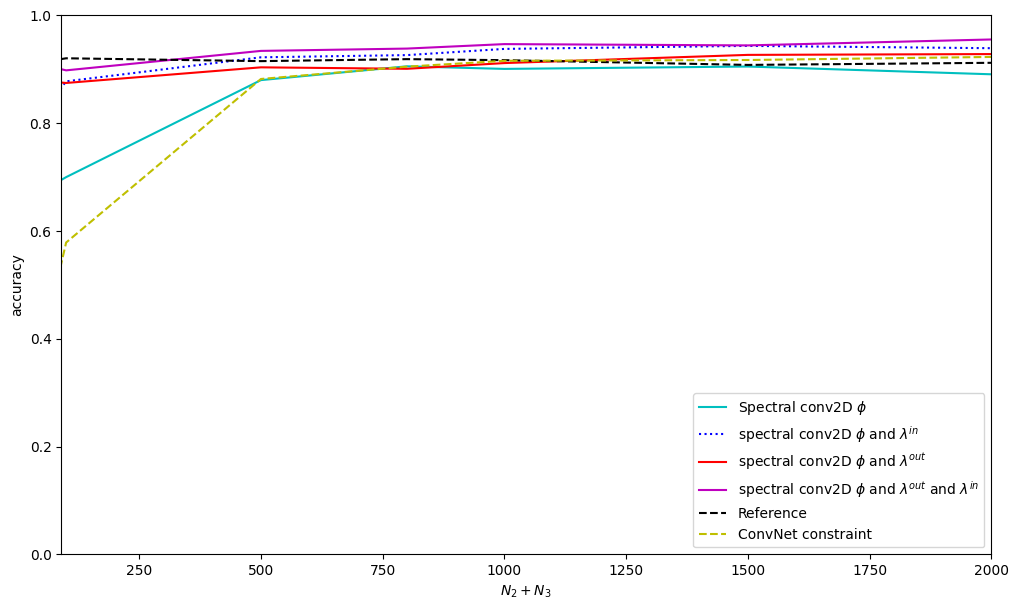

In [38]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N2,score1, "c-")
plt.plot(N2,score2, "b:")
plt.plot(N2,score3, "r")
plt.plot(N2,score4, "m"  )
plt.plot(N2,score5, "k--"  )
plt.plot(N2,score6, "y--"  )



plt.axis([90, 2000, 0, 1])


plt.xlabel("$N_{2}+N_{3}$")
plt.ylabel("accuracy")

 #'ConvNet constraint',
plt.legend(['Spectral conv2D $\phi$',
            'spectral conv2D $\phi$ and $\lambda^{in}$',
            'spectral conv2D $\phi$ and $\lambda^{out}$',
           'spectral conv2D $\phi$ and $\lambda^{out}$ and $\lambda^{in} $',
           'Reference',
           'ConvNet constraint'],
           loc='lower right')

plt.show()